In [2]:
reset()

In [3]:
%display latex

In [4]:
M=Manifold(4,"M")

In [5]:
XS.<t,r,th,ph> = M.chart(r't r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\phi')

In [6]:
T = M.affine_connection('T',"T")

In [10]:
m=var("m")
k1=var("k1")
k2=var("k2")
k3=var("k3")
T[0,0,0] = 0
T[0,0,1] = k1/(2*(k2-k1/r)*r^2)
T[0,1,0]= T[0,0,1]
T[0,1,1] = 0
T[0,2,2] =0
T[0,3,3] = 0
T[1,0,0] =(k1*k3*(-k2+k1/r))/(2*r^2)
T[1,0,1] = 0
T[1,1,1] = -k1/(2*(k2-k1/r)*r^2)
T[1,2,2] =-k3*(-k2+k1/r)*r
T[1,3,3] =  (-k3*(-k2+k1/r)*r)*(sin(th))^2
T[2,0,2] = 0
T[2,0,3] = 0
T[2,1,2] = 1/r
T[2,2,1]=T[2,1,2]
T[2,1,3] = 0
T[2,3,3] = -cos(th)*sin(th)
T[3,0,2] = 0
T[3,0,3] = 0
T[3,1,2] = 0
T[3,1,3] =T[2,1,2]
T[3,3,1]=T[3,1,3]
T[3,2,3] = cos(th)/sin(th)
T[3,3,2]=T[3,2,3]

In [11]:
Riem= T.riemann()

In [12]:
Riem.display_comp(only_nonredundant=True)

X^t_r,t,r = k1/(k2*r^3 - k1*r^2) 
X^t_th,t,th = 1/2*k1*k3/r 
X^t_ph,t,ph = 1/2*k1*k3*sin(th)^2/r 
X^r_t,t,r = -(k1*k2*k3*r - k1^2*k3)/r^4 
X^r_th,r,th = 1/2*k1*k3/r 
X^r_ph,r,ph = 1/2*k1*k3*sin(th)^2/r 
X^th_t,t,th = 1/2*(k1*k2*k3*r - k1^2*k3)/r^4 
X^th_r,r,th = 1/2*k1/(k2*r^3 - k1*r^2) 
X^th_ph,th,ph = -(k1*k3 - (k2*k3 + 1)*r)*sin(th)^2/r 
X^ph_t,t,ph = 1/2*(k1*k2*k3*r - k1^2*k3)/r^4 
X^ph_r,r,ph = 1/2*k1/(k2*r^3 - k1*r^2) 
X^ph_th,th,ph = (k1*k3 - (k2*k3 + 1)*r)/r

In [13]:
Ric = T.ricci()
Ric.display()

(k2*k3 + 1) dth⊗dth + (k2*k3 + 1)*sin(th)^2 dph⊗dph

In [14]:
g = M.lorentzian_metric('g')


In [15]:
g[0,0], g[1,1] =  -function("f")(r), 1/function("f")(r)
g[2,2], g[3,3] = r^2, (r*sin(th))^2

In [49]:
g[0,0], g[1,1] = -1, 1


In [16]:
g.display()

g = -f(r) dt⊗dt + 1/f(r) dr⊗dr + r^2 dth⊗dth + r^2*sin(th)^2 dph⊗dph

In [17]:
dR=Riem.down(g)

In [18]:
uR=Riem.up(g)

In [19]:
Kr = uR.contract(0, 1, 2, 3, dR, 0, 1, 2, 3)
Kr.expr().factor()

(4*k2^4*k3^2*r^6*f(r)^2 - 16*k1*k2^3*k3^2*r^5*f(r)^2 + 3*k1^2*k2^4*k3^2*r^4 + 26*k1^2*k2^2*k3^2*r^4*f(r)^2 + 8*k2^3*k3*r^6*f(r)^2 - 12*k1^3*k2^3*k3^2*r^3 - 20*k1^3*k2*k3^2*r^3*f(r)^2 - 24*k1*k2^2*k3*r^5*f(r)^2 + 18*k1^4*k2^2*k3^2*r^2 + 6*k1^4*k3^2*r^2*f(r)^2 + 24*k1^2*k2*k3*r^4*f(r)^2 + 4*k2^2*r^6*f(r)^2 + 3*k1^2*r^4*f(r)^4 - 12*k1^5*k2*k3^2*r - 8*k1^3*k3*r^3*f(r)^2 - 8*k1*k2*r^5*f(r)^2 + 3*k1^6*k3^2 + 4*k1^2*r^4*f(r)^2)/((k2*r - k1)^2*r^8*f(r)^2)

In [49]:
func = Kr.expr().subs(k3=0).subs().factor( )
func

(4*k2^2*r^2 + 3*k1^2*f(r)^2 - 8*k1*k2*r + 4*k1^2)/((k2*r - k1)^2*r^4)

In [37]:
var("F")
value = 4*k2^2 * r^2+3*k1^2*F^2-8*k1*k2*r+4*k1^2== 0
solve(value, F)


[F == -2/3*sqrt(3)*(I*k2*r - I*k1)/k1, F == -2/3*sqrt(3)*(-I*k2*r + I*k1)/k1]

In [32]:
var("F")
value = (k2^2*r^4*F^2 + 2*k2^2*r^4 - 4*k1*k2*r^3 + 2*k1^2*r^2)* F^2 + k2^4*r^4 - 4*k1+k2^3*r^3 + 6*k1^2*k2^2*r^2 - 4*k1^3*k2*r + k1^4== 0
solve(value, F)


[F == -sqrt(-k2^2*r^2 + 2*k1*k2*r - k1^2 + sqrt(-k2^6*r^4 - 6*k1^2*k2^4*r^2 - k2^5*r^3 + k2^4*r^4 + 4*k1^3*k2^3*r - 4*k1*k2^3*r^3 - k1^4*k2^2 + 6*k1^2*k2^2*r^2 - 4*k1^3*k2*r + k1^4 + 4*k1*k2^2))/(k2*r), F == sqrt(-k2^2*r^2 + 2*k1*k2*r - k1^2 + sqrt(-k2^6*r^4 - 6*k1^2*k2^4*r^2 - k2^5*r^3 + k2^4*r^4 + 4*k1^3*k2^3*r - 4*k1*k2^3*r^3 - k1^4*k2^2 + 6*k1^2*k2^2*r^2 - 4*k1^3*k2*r + k1^4 + 4*k1*k2^2))/(k2*r), F == -sqrt(-k2^2*r^2 + 2*k1*k2*r - k1^2 - sqrt(-k2^6*r^4 - 6*k1^2*k2^4*r^2 - k2^5*r^3 + k2^4*r^4 + 4*k1^3*k2^3*r - 4*k1*k2^3*r^3 - k1^4*k2^2 + 6*k1^2*k2^2*r^2 - 4*k1^3*k2*r + k1^4 + 4*k1*k2^2))/(k2*r), F == sqrt(-k2^2*r^2 + 2*k1*k2*r - k1^2 - sqrt(-k2^6*r^4 - 6*k1^2*k2^4*r^2 - k2^5*r^3 + k2^4*r^4 + 4*k1^3*k2^3*r - 4*k1*k2^3*r^3 - k1^4*k2^2 + 6*k1^2*k2^2*r^2 - 4*k1^3*k2*r + k1^4 + 4*k1*k2^2))/(k2*r)]

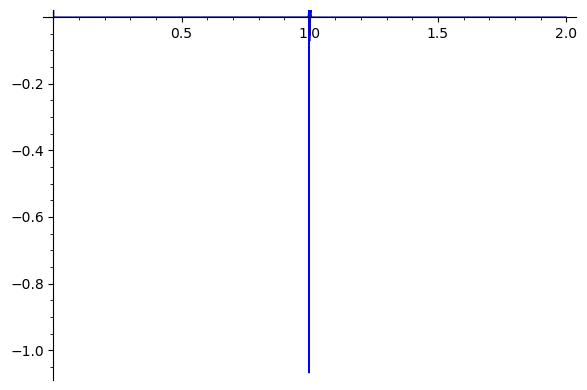

In [81]:
plot(func, r, 0,2, ymax=1)

In [1]:
fr = (3^(1/2)*k2*r^2)/(2^(1/2)*k1^3-2*2^(1/2)*k1^2 * r +2^(1/2)*k1*r^2)
fr

NameError: name 'k2' is not defined

In [130]:
plot(fr.subs(k2=1).subs(k1=2), r, -5,5, ymax=1000)

In [ ]:
-((2 a[r])/r) + 4 a[r]^2 + 4 r a[r]^3 + 2 Derivative[1][a][r] + 
  6 r a[r] Derivative[1][a][r] + r (a^\[Prime]\[Prime])[r] == 0
    
var("")
value = (2*k1^6 -8* k1^5 * r +12*k1^4 *r^2 -8*k1^3 * r^3 +2*k1^2 * r^4 )* F^2 +3* k2^2 * r^4 == 0
solve(value, F)


In [37]:
r = var('r')
a = function('a')(r)
de = ((-2*a)/r)+4*a^2+4*r*a^3+2*diff(a,r)+6*r*a*diff(a,r)+r*diff(a,r,2)== 0
Y=desolve(de, a, algorithm="fricas");Y

TypeError: unable to start fricas because the command 'fricas -nosman' failed: The command was not found or was not executable: fricas.

In order to use the FriCAS interface you need to have FriCAS installed.
You can either run 'sage -i fricas' to install FriCAS as an optional
package within SageMath, or install FriCAS separately, see
http://fricas.sourceforge.net.


In [54]:
x=var('x')
y=function('y')(x)
de = x^3*diff(y, x, 3) + x^2*diff(y, x, 2) - 2*x*diff(y, x) + 2*y - 2*x^4
Y = desolve(de, y, algorithm="fricas"); Y  

ilt(-4*(2*g58150^7*D[2, 2](laplace)(y(x), x, g58150) + 3*g58150^6*D[2](laplace)(y(x), x, g58150) + 12)/g58150^8, g58150, x)